In [173]:
import pandas as pd
import plotly.express as px
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

In [174]:
dict_capturas = dict({'erik': './results/captura_erik_12:53_21-4-2022.csv',
                      'wifi exactas': './results/captura_wifi-exactas_18:18_21-4-2022.csv'})

for captura in dict_capturas.keys():
    dict_capturas[captura] = pd.read_csv(dict_capturas[captura], usecols=['simbolo', 'apariciones'])
    dict_capturas[captura].name = captura

df_captura_erik = dict_capturas['erik']
df_wifi_exactas = dict_capturas['wifi exactas']
df_wifi_exactas

,simbolo,apariciones
0,"('UNICAST', 2048)",8598.0
1,"('BROADCAST', 2048)",468.0
2,"('UNICAST', 34525)",908.0
3,"('UNICAST', 2054)",26.0


In [175]:
# separar tuplas
for df in dict_capturas.values():
    df['protocolo'] = np.zeros(len(df), dtype=int)
    df['destinatario'] = np.zeros(len(df))
    df['apariciones'] = df['apariciones'].astype(int)
    for index, row in df.iterrows():
        simbolo = row['simbolo']
        protocolo = simbolo[(simbolo.find(",")+2):(simbolo.find(")"))]
        df.loc[index, 'protocolo'] = int(protocolo)
        if simbolo.find("UNICAST") != -1:
            df.loc[index, 'destinatario'] = "UNICAST"
        else:
            df.loc[index, 'destinatario'] = "BROADCAST"


In [176]:
df_wifi_exactas

,simbolo,apariciones,protocolo,destinatario
0,"('UNICAST', 2048)",8598,2048,UNICAST
1,"('BROADCAST', 2048)",468,2048,BROADCAST
2,"('UNICAST', 34525)",908,34525,UNICAST
3,"('UNICAST', 2054)",26,2054,UNICAST


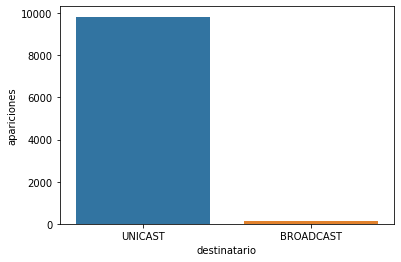

In [187]:
def graficarProporcionBroadvsUnicast(df):
    ax = sns.barplot(
        x= df['destinatario'], 
        y= df['apariciones'],
        estimator=sum,
        ci=None,
    )
    fig = ax.get_figure()
    fig.savefig(f"./graphs/broadVuni_{df.name}")
graficarProporcionBroadvsUnicast(df_captura_erik)

In [189]:
def pieBroadvUnicast(df):
    fig = px.pie(df, values='apariciones', names='destinatario', height= 500,
    width= 500)
    fig.update_traces(textfont_size=16)
    fig.show()
pieBroadvUnicast(df_captura_erik)

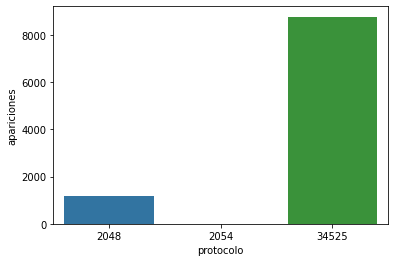

In [190]:
def barProtocolos(df):
    ax = sns.barplot(
        x= 'protocolo', 
        y= 'apariciones',
        data=df,
        estimator=sum,
        ci=None,
    )
    fig = ax.get_figure()
    fig.savefig(f"./graphs/barProtocolos_{df.name}")
barProtocolos(df_captura_erik)

In [191]:
def pieProtocolos(df):
    fig = px.pie(df, values='apariciones', names='protocolo', height= 500,
    width= 500)
    fig.update_traces(textfont_size=16)
    fig.show()
pieProtocolos(df_captura_erik)

In [192]:
dict_entropias = {}
for df in dict_capturas.values():
    cantAparicionesPorSimbolo = df['apariciones'].tolist()

    probabilidadPorSimbolo = [cantApariciones/10000 for cantApariciones in cantAparicionesPorSimbolo]
    informacionPorSimbolo = [-math.log2(probabilidad) for probabilidad in probabilidadPorSimbolo]
    df['información'] = informacionPorSimbolo
    entropia = sum([probabilidadPorSimbolo[simbolo] * informacionPorSimbolo[simbolo] for simbolo in range(len(df))])
    dict_entropias[df.name] = entropia
    print(f"La entroía de la fuente en la captura {df.name} es: {entropia}")

La entroía de la fuente en la captura erik es: 0.5889147613110136
La entroía de la fuente en la captura wifi exactas es: 0.7307060821531212


In [193]:
def informacionPorSimbolo(df):

    fig = px.bar(df,
        y= 'simbolo', 
        x= 'información',
        labels={
                "simbolo": "Símbolo de la fuente",
                "información": "Información por símbolo",
                        },
        height= 600,
        width= 850,
        text_auto=True,
        orientation='h')
    entropia = dict_entropias[df.name]
    entropia_maxima = math.log2(len(df))
    fig.add_vline(x=entropia,  line_dash="dot", line_color="yellow", annotation_text="Entropía",annotation_position="bottom right", annotation=dict(font_size=15),)
    fig.add_vline(x=entropia_maxima,  line_dash="dot", line_color="red", annotation_text="Entropía máxima",annotation_position="bottom right", annotation=dict(font_size=15),)
    fig.show()
informacionPorSimbolo(df_captura_erik)